### Customer Sentiment Insights: NLP Analysis of Amazon Reviews

### Import csv file into Dataframe - Code done by Ajesh

In [1]:
import pandas as pd
df = pd.read_csv('Amazon_Reviews_Dataset.csv')

In [10]:
# Retrieve unique product names
unique_products = df['product name'].unique()

# Display the unique products
print(unique_products)

['Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml'
 'Harry Potter: The Complete 8-Film Collection'
 'EnerPlex Premium 3-Ply Reusable Face Mask - Breathable Comfort, Fully Machine Washable, Face Masks for Home Office Work Outdoors - LARGE (3-Pack)'
 'Sparkling ICE Sparkling Water, Variety Pack'
 'Echo Dot (3rd Gen) - Smart speaker with Alexa - Sandstone'
 'Turmeric Curcumin with BioPerine 95% Curcuminoids 1950mg with Black Pepper for Best Absorption, Made in USA, Natural Immune Support, Turmeric Supplement Pills by Natures Nutrition - 120 Capsules'
 'Becoming']


### Data Preprocessing 

In [ ]:
import re
from bs4 import BeautifulSoup

# Function to remove HTML tags
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()


#  Function to clean the review text
def clean_review_text(text):
    # Removing HTML/XML tags
    text = remove_html_tags(text)
    # removing any irrelevant characters and \n\n
    clean_text = re.sub(r'[^\w\s]', '', text)
    # Lowercasing
    text = text.lower()
    # Strip leading and trailing whitespace
    text = text.strip()
    return text


# Use normalize_text function to normalize  the 'text' column
df['clean_product_review_text'] = df['reviews'].apply(clean_review_text)

print(df['clean_product_review_text'])

### Tokenization of  Review column

In [ ]:
import nltk
from nltk.tokenize import word_tokenize


# Function to tokenize text using NLTK's word_tokenize
def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization to the 'clean_product_review_text' column and store the result in 'tokenization_review_text'
df['tokenization_review_text'] = df['clean_product_review_text'].apply(tokenize_text)

print("Product Review tokenized",df['tokenization_review_text'])

### Removal of Stopwords

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')  

# Function to remove stopwords from tokenized text
def remove_stopwords(texts):
    stop_words = set(stopwords.words('english'))  
    return [word for word in texts if word not in stop_words]


# Apply stopwords removal to the 'tokenization_review_text' column and store the result in 'removed_stopwords_text'
df['removed_stopwords_reviews'] = df['tokenization_review_text'].apply(remove_stopwords)


print("Removal of Review Stopwords:")
print(df['removed_stopwords_reviews'].values)

### Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

# Function to lemmatize words in text
def lemmatize_texts(texts):
    lemmatizer = WordNetLemmatizer() 
    return [lemmatizer.lemmatize(word) for word in texts]

# Apply lemmatization to  'removed_stopwords_reviews' column and store  in 'lemmatized_review'
df['lemmatized_review'] = df['removed_stopwords_reviews'].apply(lemmatize_texts)

print("Lemmatized Text:", df['lemmatized_review'].values)

## Task 1: Thematic Analysis for Product Improvement - Code done by Ajesh

### To Analyse the most common or frequent words in the reviews (TF-IDF)

In [60]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


# Join the lemmatized tokens into a single string per review
df['lemmatized_text'] = df['lemmatized_review'].apply(lambda tokens: ' '.join(tokens))

# Initialize the TF-IDF Vectorizer with a maximum of 1000 features
tfidf = TfidfVectorizer(max_features=1000)

# Fit the TF-IDF model and transform the data
features = tfidf.fit_transform(df['lemmatized_text'])

# Calculate the sum of TF-IDF scores for each feature (word) across all documents (reviews)
tfidf_sum = np.sum(features, axis=0)

# Convert the sum to a numpy array
tfidf_sum_array = np.array(tfidf_sum).flatten()

# Map words to their TF-IDF sums
word_scores = {word: score for word, score in zip(tfidf.get_feature_names_out(), tfidf_sum_array)}

# Sort words by their scores in descending order
sorted_word_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)

# Print the top 20 words with their TF-IDF scores
for word, score in sorted_word_scores:
    print(f"{word}: {score}")

great: 1654.3071980850261
love: 1398.5597314577076
good: 1350.60417176355
product: 1054.1918369405093
like: 918.5322511402125
book: 819.3499831593183
one: 818.4462342333986
mask: 816.680920754747
smell: 753.1540736709295
price: 699.1674570988964
movie: 634.7217201575162
flavor: 619.5239119188236
time: 611.203704314889
well: 598.1342939396386
fit: 586.5493496189937
work: 559.081151309047
alexa: 534.6023256438467
would: 525.386293426819
really: 520.1960493734844
get: 505.5435040315998
comfortable: 491.895069113024
set: 483.43561098753435
taste: 481.7741451766534
read: 475.3122675338388
pain: 468.9210293439723
much: 456.70850115882064
nice: 453.78360679029686
day: 440.75493827771237
echo: 434.69468679067796
michelle: 432.4444970374813
quality: 432.2252839284856
use: 431.31453887624264
bought: 425.01740171852964
first: 424.0325205054017
dot: 422.1617255983011
drink: 420.73257152556994
obama: 410.1830323335707
buy: 401.39216673063544
better: 400.93226080009026
best: 390.41870362898214
life:

In [ ]:
!pip install wordcloud


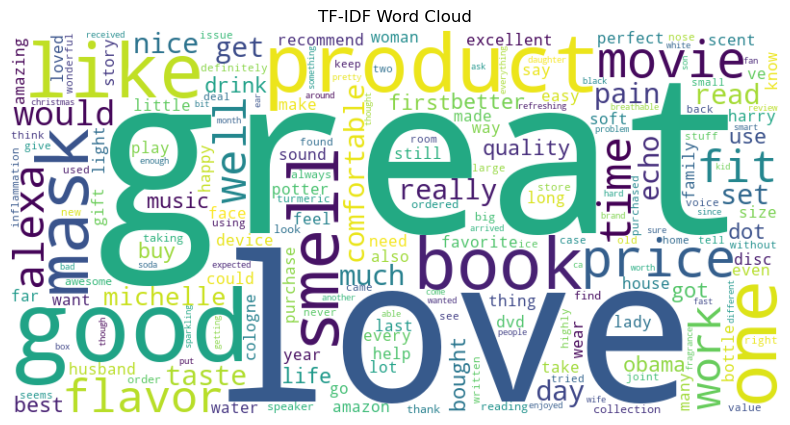

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate a word cloud using TF-IDF scores
wordcloud.generate_from_frequencies(word_scores)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('TF-IDF Word Cloud')
plt.show()


### Identify and classify underlying topics within the textual content- LDA Topic Modelling

In [ ]:
!pip install gensim nltk

In [6]:
import re

def clean_and_remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    # Add specific punctuations and escaped characters to remove
    stop_words.update(['.', ',', '!', '..', '’', '\'s', 'n\'t', '\n', '\t', '...', '..', '(', ')', 'nt'])

    # Remove unwanted characters and split into words if not already
    words = re.sub(r'[^\w\s]', '', ' '.join(words))  # Remove all punctuations
    words = re.sub(r'\s+', ' ', words)  # Replace multiple whitespace with single space
    words = words.strip().split()  # Split into words after stripping unnecessary spaces

    # Filter out stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words

# Assuming df['lemmatized_review'] contains lists of lemmatized words
df['processed_review'] = df['lemmatized_review'].apply(clean_and_remove_stopwords)




In [7]:
from gensim.corpora import Dictionary

# Convert the 'processed_review' column (which now contains lists of words) to a list of these lists
preprocessed_documents = df['processed_review'].tolist()

# Create a dictionary representation of the documents
dictionary = Dictionary(preprocessed_documents)

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_documents]



In [11]:
from gensim.models import LdaModel

# Set training parameters
num_topics = 7
passes = 15
model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Assign topics to documents
df['LDA_Topic'] = [max(model[doc], key=lambda x: x[1])[0] for doc in corpus]

# Print the topics
topics = model.print_topics(num_words=35)
for topic in topics:
    print(topic)

(0, '0.062*"great" + 0.045*"written" + 0.036*"woman" + 0.023*"honest" + 0.021*"family" + 0.018*"hear" + 0.016*"question" + 0.015*"set" + 0.013*"awesome" + 0.012*"love" + 0.011*"growing" + 0.011*"answer" + 0.009*"beautiful" + 0.008*"beginning" + 0.008*"fast" + 0.007*"former" + 0.007*"hearing" + 0.007*"daughter" + 0.007*"price" + 0.007*"intelligent" + 0.007*"well" + 0.006*"disc" + 0.006*"potter" + 0.006*"informative" + 0.006*"harry" + 0.006*"fan" + 0.006*"mostly" + 0.006*"added" + 0.006*"8" + 0.005*"dvd" + 0.005*"version" + 0.005*"deal" + 0.005*"came" + 0.005*"quality" + 0.005*"age"')
(1, '0.030*"voice" + 0.027*"mask" + 0.020*"well" + 0.016*"journey" + 0.016*"fit" + 0.015*"country" + 0.013*"good" + 0.013*"easy" + 0.012*"size" + 0.011*"comfortable" + 0.010*"face" + 0.010*"great" + 0.009*"control" + 0.009*"worked" + 0.008*"large" + 0.007*"feel" + 0.007*"perspective" + 0.007*"big" + 0.007*"like" + 0.006*"perfect" + 0.006*"work" + 0.006*"soft" + 0.006*"open" + 0.006*"would" + 0.006*"done" + 

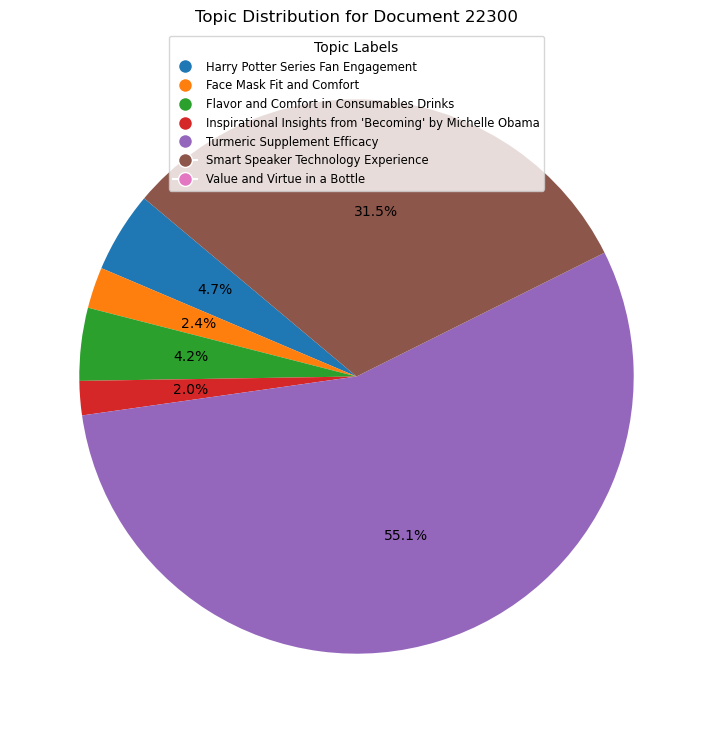

In [13]:
import matplotlib.pyplot as plt
import numpy as np
 
# Choose a document index
doc_id = 22300
 
# Get the topic distribution for the document
doc_topics = model.get_document_topics(corpus[doc_id])
 
# Separate the topic IDs and their corresponding probabilities
topic_ids, probs = zip(*doc_topics)
 
# Define topic labels
topic_labels = {
    0: 'Harry Potter Series Fan Engagement',
    1: 'Face Mask Fit and Comfort',
    2: 'Flavor and Comfort in Consumables Drinks',
    3: "Inspirational Insights from 'Becoming' by Michelle Obama",
    4: 'Turmeric Supplement Efficacy',
    5: 'Smart Speaker Technology Experience',
    6: 'Value and Virtue in a Bottle'
}

 
# Plot
plt.figure(figsize=(9, 9))  # Adjust the figure size as needed
patches, _, _ = plt.pie(probs, labels=['']*len(probs), autopct='%1.1f%%', startangle=140)
 
# Create a custom legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                              markersize=10, markerfacecolor='C{}'.format(i))
                  for i, label in topic_labels.items()]
plt.legend(handles=legend_handles, title="Topic Labels", loc="upper center", fontsize='small')
 
plt.title(f'Topic Distribution for Document {doc_id}')
plt.show()
 

### Feature Extraction

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# df['lemmatized_review'] contains lists of lemmatized tokens
lemmatized_reviews = [' '.join(tokens) for tokens in df['processed_review']]

tfidf = TfidfVectorizer(max_features=1000)
features = tfidf.fit_transform(lemmatized_reviews)



### Model Training and Evaluation

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Split the dataset into training and testing sets, using 20% of the data for testing.
X_train, X_test, y_train, y_test = train_test_split(features, df['LDA_Topic'], test_size=0.2, random_state=42)
# Create an instance of the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

/Users/sanilanair/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Evaluation
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))

Accuracy: 0.8627142857142858
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       459
           1       0.93      0.91      0.92       869
           2       0.92      0.91      0.92      1895
           3       0.79      0.77      0.78       495
           4       0.71      0.82      0.77       336
           5       0.84      0.69      0.76       481
           6       0.84      0.88      0.86      2465

    accuracy                           0.86      7000
   macro avg       0.84      0.82      0.83      7000
weighted avg       0.86      0.86      0.86      7000



## Task 2: Sentiment Analysis 

###  Train a sentiment analysis model using an appropriate NLP library(VEDAR)

In [17]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to convert list of words to a single string
def list_to_string(lemmas):
    return ' '.join(lemmas)  # Join words in the list to form a single string

# Function to get sentiment scores for a text string
def get_sentiment_scores(text):
    if text:  # Checking if text is not empty
        return sia.polarity_scores(text)
    return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}

# Convert lists to strings and then apply sentiment analysis
df['review_data'] = df['processed_review'].apply(list_to_string)
df['sentiment_scores'] = df['review_data'].apply(get_sentiment_scores)
result_df = df[['review_data', 'sentiment_scores']]

result_df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sanilanair/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review_data,sentiment_scores
0,product exceeded expectation complaint cologne...,"{'neg': 0.11, 'neu': 0.5, 'pos': 0.39, 'compou..."
1,terrible knock ordered received immediately co...,"{'neg': 0.1, 'neu': 0.799, 'pos': 0.1, 'compou..."
2,right smell kind like bowl honeydew cantaloupe...,"{'neg': 0.125, 'neu': 0.484, 'pos': 0.39, 'com..."
3,told friend cologne smell good got man birthda...,"{'neg': 0.313, 'neu': 0.342, 'pos': 0.345, 'co..."
4,originally felt sketchy ordering may due reall...,"{'neg': 0.099, 'neu': 0.603, 'pos': 0.298, 'co..."
...,...,...
34995,wife loved reading,"{'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'comp..."
34996,normally read autobiography put loved learning...,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp..."
34997,purchase book mother informing page missing bl...,"{'neg': 0.097, 'neu': 0.619, 'pos': 0.283, 'co..."
34998,glad purchased wonderful human,"{'neg': 0.0, 'neu': 0.23, 'pos': 0.77, 'compou..."


### Validate the model with a separate test set and document its performance

In [18]:
# Extracting each component of the sentiment scores
df['positive_score'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['negative_score'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['neutral_score'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Checking the new columns
print(df[['positive_score', 'negative_score', 'neutral_score', 'compound_score']].head())


   positive_score  negative_score  neutral_score  compound_score
0           0.390           0.110          0.500          0.9531
1           0.100           0.100          0.799         -0.2500
2           0.390           0.125          0.484          0.9559
3           0.345           0.313          0.342          0.0772
4           0.298           0.099          0.603          0.9625


In [19]:
from sklearn.model_selection import train_test_split

# Assuming you define 'target' based on some criteria
# Example if you want to use 'compound_score' to define sentiment
df['target'] = df['compound_score'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Features and target
X = df[['positive_score', 'negative_score', 'neutral_score', 'compound_score']]  # These are your features
y = df['target']  # This is your target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predictions on the test set
predictions = model.predict(X_test)

# Generate and print the classification report
classification_report_output = classification_report(y_test, predictions)
print("Classification Report:")
print(classification_report_output)


Classification Report:
              precision    recall  f1-score   support

    negative       0.98      0.97      0.98       591
     neutral       0.95      0.96      0.95       538
    positive       1.00      1.00      1.00      5871

    accuracy                           0.99      7000
   macro avg       0.98      0.98      0.98      7000
weighted avg       0.99      0.99      0.99      7000



### Statistical analysis to present the distribution of sentiments by products

<Figure size 1200x800 with 0 Axes>

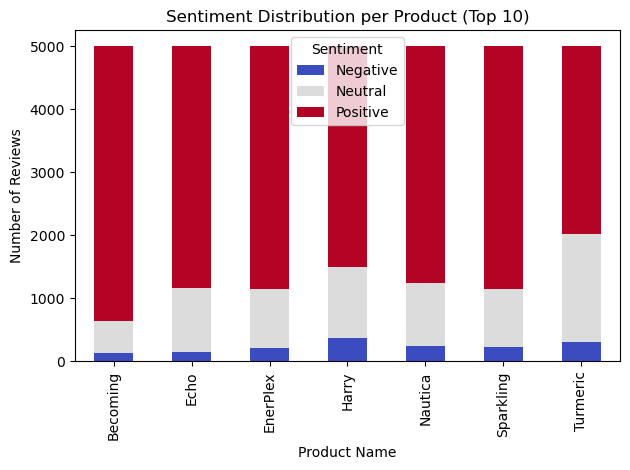

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# Sample data loading - replace with your actual data loading method
# df = pd.read_csv('your_data.csv')

# Sentiment calculation
df['polarity'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = df['polarity'].apply(lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral'))
df['product_short_name'] = df['product name'].str.split().str[0]

# Identify the top 10 products by review count
top_products = df['product_short_name'].value_counts().nlargest(10).index

# Filter DataFrame to include only the top products
df_top = df[df['product_short_name'].isin(top_products)]

# Aggregate sentiment counts for each top product
sentiment_counts = df_top.groupby(['product_short_name', 'Sentiment']).size().unstack(fill_value=0)

# Visualization of sentiment distribution per top product
plt.figure(figsize=(12, 8))  # You can adjust this size as needed
sentiment_counts.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Sentiment Distribution per Product (Top 10)')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.tight_layout()

# Show the plot
plt.show()


In [34]:
# Statistical summary of sentiment counts
stat_summary = sentiment_counts.describe()
print("Statistical Summary of Sentiment Counts:")
print(stat_summary)


Statistical Summary of Sentiment Counts:
Sentiment    Negative      Neutral     Positive
count        7.000000     7.000000     7.000000
mean       234.714286  1031.285714  3734.000000
std         87.629360   357.000333   420.679213
min        131.000000   505.000000  2975.000000
25%        177.500000   933.500000  3630.000000
50%        226.000000  1010.000000  3841.000000
75%        277.000000  1063.500000  3849.000000
max        377.000000  1710.000000  4364.000000


###  Statistical analysis to present the distribution of sentiments by themes

<Figure size 1500x1200 with 0 Axes>

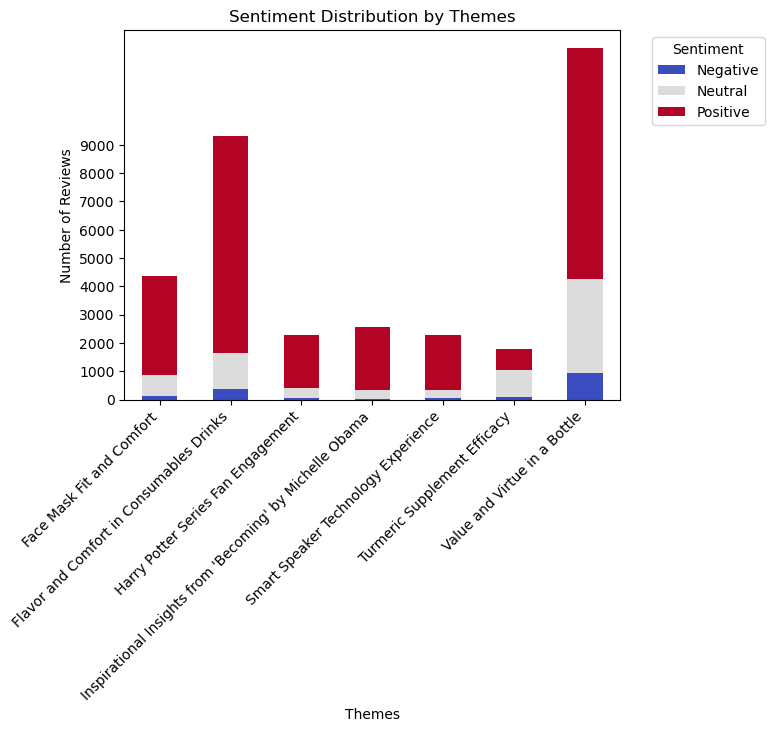

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from textblob import TextBlob



# Define the topic labels mapping from LDA_Topic to descriptive names
topic_labels = {
    0: 'Harry Potter Series Fan Engagement',
    1: 'Face Mask Fit and Comfort',
    2: 'Flavor and Comfort in Consumables Drinks',
    3: "Inspirational Insights from 'Becoming' by Michelle Obama",
    4: 'Turmeric Supplement Efficacy',
    5: 'Smart Speaker Technology Experience',
    6: 'Value and Virtue in a Bottle'
}

df['polarity'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = df['polarity'].apply(lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral'))

# Map 'LDA_Topic' to descriptive labels
df['Topic_Label'] = df['LDA_Topic'].map(topic_labels)
# Aggregate sentiment counts for each top product
sentiment_counts = df.groupby(['Topic_Label', 'Sentiment']).size().unstack(fill_value=0)


# Visualization: Sentiment Distribution by Themes
plt.figure(figsize=(15, 12))  # Specify the figure size only once here
sentiment_counts.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Sentiment Distribution by Themes')
plt.xlabel('Themes')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 10000, 1000))  # Setting y-axis ticks from 0 to 5000 with increments of 1000

# Place the legend outside the plot
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

In [47]:
# Statistical summary of sentiment counts
stat_summary = sentiment_counts.describe()
print("Statistical Summary of Sentiment Counts:")
print(stat_summary)

Statistical Summary of Sentiment Counts:
Sentiment    Negative      Neutral   Positive
count        7.000000     7.000000     7.0000
mean       234.714286  1031.285714  3734.0000
std        330.864380  1069.633538  2980.2888
min         27.000000   303.000000   735.0000
25%         43.500000   328.500000  1914.0000
50%         78.000000   728.000000  2222.0000
75%        259.500000  1110.000000  5582.5000
max        932.000000  3311.000000  8188.0000


### Relationship between the customer ratings and the sentiments

In [56]:
def get_sentiment(text):
    return TextBlob(' '.join(text)).sentiment.polarity
 
df['sentiment'] = df['processed_review'].apply(get_sentiment)

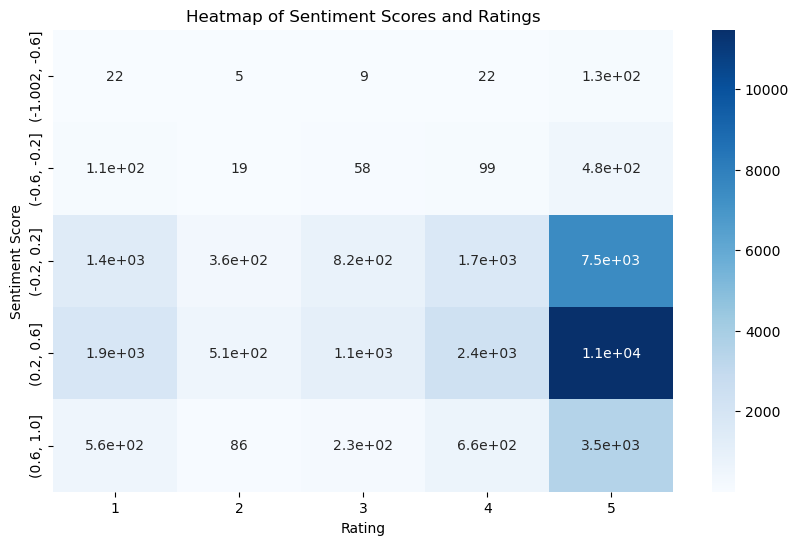

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn
# Compute a binned statistic for each rating and sentiment score
heatmap_data = pd.crosstab(pd.cut(df['sentiment'], bins=5), df['ratings'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues')
plt.title('Heatmap of Sentiment Scores and Ratings')
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.show()

## Task 3: Simple Question Answering System

###  List of common questions customers might ask about the products(Collaborated as a Team)

In [58]:
questions = [
    "How would you describe Nautica Voyage's scent?",
    "Is Nautica Voyage worth its price?",
    "Do users get compliments with Nautica Voyage?",
    "How long does the scent of Nautica Voyage Men typically last?",
    "Is Nautica Voyage toilette spray suitable for everyday use or special occasions?",
    "What age group primarily uses Nautica Voyage toilette spray?",
    "Can Nautica Voyage be considered a good gift option?",
    "How do users rate the packaging of Nautica Voyage?",
    "Are there any bonus materials in Harry Potter?",
    "What age group is the Harry Potter movie collection most suitable for?",
    "How do reviewers rate the packaging of the Harry Potter collection?",
    "What is the total runtime of the Harry Potter film collection?",
    "Is the Harry Potter available in multiple languages?",
    "What are the washing instructions for the EnerPlex face mask?",
    "How effective is the EnerPlex face mask in filtering particles?",
    "What sizes are available for the EnerPlex face mask?",
    "Can the EnerPlex reusable face mask be adjusted for different face sizes?",
    "What colors do the EnerPlex face mask come in?",
    "What flavors are included in the Sparkling ICE Sparkling Water Variety Pack?",
    "How do the calories in Sparkling ICE Sparkling Water compare to other soft drinks?",
    "Is Sparkling ICE Sparkling Water artificially sweetened?",
    "What is the carbonation level of Sparkling ICE Sparkling Water like?",
    "How do users rate the packaging of the Sparkling ICE Sparkling Water?",
    "How do users integrate the Echo Dot into their smart home systems?",
    "What is the audio quality reviews for the Echo Dot smart speaker with Alexa - Sandstone?",
    "Can the Echo Dot control other smart devices?",
    "What privacy features are available on the Echo smart speaker with Alexa?",
    "How do users rate the design and aesthetics of the Echo Dot sandstone?",
    "How do users describe the effectiveness of Turmeric Curcumin for joint pain?",
    "Are there any side effects reported by users of Turmeric Curcumin?",
    "How does BioPerine enhance the absorption of curcumin in Turmeric Curcumin supplements?",
    "What is the recommended dosage for Turmeric Curcumin?",
    "How long before noticing benefits from taking Turmeric?",
    "What are the main themes discussed in the book Becoming?",
    "How do readers describe the writing style of Becoming?",
    "What insights into her personal life does Michelle Obama share in Becoming?",
    "How has Becoming influenced readers' perspectives on leadership and resilience?",
    "What are the critical reviews saying about the structure and pace of Becoming?",
    "Any noticed changes in Nautica Voyage's scent?"
    "What made the masks comfortable for the warehouse worker?"
    "How did the masks fit the reviewer with a fat face, and what benefits did they mention?"
    "How breathable were the masks, and how did they compare to others?"
    "How did the masks fit the reviewer's family of different ages?"
    "main DVD quality issues?"
    "How Specific movie problems faced?"
    "How Initial packaging impression and issues?"
    "Return process vs. obtaining replacement?"
]


In [59]:
import pandas as pd
import re
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# NLTK setup for keyword extraction
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sanilanair/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanilanair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Identify a set of keywords or phrases that are likely to be relevant to the answer

In [60]:
def extract_keywords(question):
    # Define the English stopwords and add custom unwanted characters
    stop_words = set(stopwords.words('english'))
    custom_stopwords = ['vs', 's']  # Add 's' to handle possessive cases if not already handled
    stop_words.update(custom_stopwords)
    
    # Define a tokenizer that excludes punctuation and splits on spaces
    tokenizer = RegexpTokenizer(r'\w+')
    
    # Tokenize the question into words, removing punctuation
    words = tokenizer.tokenize(question)
    
    # Filter out stopwords and unwanted characters, then return keywords
    keywords = [word for word in words if word.lower() not in stop_words]
    return keywords

### Search the reviews for sentences containing the keywords associated with each question

In [61]:
# This function aims to find and return sentences from a list of reviews that contain any of the specified keywords
def search_reviews_for_keywords(reviews, relevant_keywords, user_keywords):
    results = []
    # Filter the keywords to include only those that are both in relevant_keywords and user_keywords
    filtered_keywords = [kw for kw in relevant_keywords if kw.lower() in [uk.lower() for uk in user_keywords]]
    # Compile a regular expression pattern that matches any of the filtered keywords
    pattern = re.compile(r'\b(' + '|'.join(re.escape(kw) for kw in filtered_keywords) + r')\b', re.IGNORECASE)

    for review in reviews:
        sentences = sent_tokenize(review)
        for sentence in sentences:
            if pattern.search(sentence):
                results.append(sentence.strip())
    return results

### Extract relevant answers from a collection of reviews

In [62]:
# This function aims to extract relevant answers from a collection of reviews based on the keywords
def answer_question(user_query, questions, keywords_list, reviews):
    user_keywords = extract_keywords(user_query)
    print("User Keywords:", user_keywords)

    possible_matches = []
    # Compare user's keywords with predefined lists of keywords to find matches.
    for keywords in keywords_list:
        match_score = sum(1 for keyword in user_keywords if keyword.lower() in map(str.lower, keywords))
        if match_score > 0:
            possible_matches.append((match_score, keywords))

    if possible_matches:
        best_match = max(possible_matches, key=lambda x: x[0])[1]
        print("Relevant Keywords:", best_match)

        answer_sentences = search_reviews_for_keywords(reviews, best_match, user_keywords)
        if answer_sentences:
            print("Answers...")
            for index, sentence in enumerate(answer_sentences, start=1):
                print(f"{index}. {sentence}")
            print("End of answers.")
        else:
            print("Keywords found, but no matching sentences.")
        return ""
    else:
        return "Sorry, I can't find an answer to your question. Please try again."


### User testing

### Aggregate all sentences found for each question making it an interactive Q & A

In [ ]:
def customerInsightsQA(reviews, questions, keywords_list):
    print("Welcome to the Customer Insights QA System. Ask a question or type 'quit' to exit.")     
    while True:
        user_query = input("Your question: ").strip()
        if user_query.lower() == 'quit':
            print("Thank you for using the QA System. Goodbye!")
            break

        response = answer_question(user_query, questions, keywords_list, reviews)
        print(response)

# Assuming 'reviews' is already a column in df containing the text data
reviews = df['reviews']


keywords_list = [extract_keywords(question) for question in questions]

# Run the interactive QA system
customerInsightsQA(reviews, questions, keywords_list)

### Evaluating Q & A System performance

In [67]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Define the question and answers
question = "What is the recommended dosage for Turmeric Curcumin?"
answers = [
    "This turmeric has helped with all the chronic pains I’ve suffered with and endured for 30 years.",
    "I've been using Turmeric for several years now",
    "Turmeric and other herbs are an amazing part of feeling good.",
    "These have a weird taste that I haven't noticed with other Turmeric Curcumin supplements.",
    " What I love about the product is that you can smell the turmeric, unusual for a capsule.",
   ]

# Manually identified relevant indices and system's predicted indices
relevant_indices = {1, 3, 7, 13}  # Correctly identifies relevant sentences
predicted_indices = {1, 3, 5, 8, 13}  # Predictions made by the system

# Convert to binary labels for evaluation
expected_labels = [1 if index in relevant_indices else 0 for index, _ in enumerate(answers)]
predicted_labels = [1 if index in predicted_indices else 0 for index, _ in enumerate(answers)]

# Calculating precision, recall, F1 score, and accuracy
precision, recall, f1, _ = precision_recall_fscore_support(expected_labels, predicted_labels, average='binary')
accuracy = accuracy_score(expected_labels, predicted_labels)  # Calculating accuracy

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")  # Display the accuracy as a percentage


Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Accuracy: 1.00
